# Project-1 Data Science with Python

# # Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [4]:
import warnings
warnings.filterwarnings('ignore')

# # Data Read

In [6]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [10]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [12]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [14]:
#lets convert the date strings to date types
df['Created Date'] = df['Created Date'].astype('datetime64')
df['Closed Date'] = df['Closed Date'].astype('datetime64')
df['Due Date'] = df['Due Date'].astype('datetime64')
df['Resolution Action Updated Date'] = df['Resolution Action Updated Date'].astype('datetime64')

In [16]:
df.shape

(300698, 54)

# # Data Wrangling

In [20]:
#lets check the null values in df
df.isnull()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Create Date
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,False,False,True,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,False
300694,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
300695,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
300696,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [21]:
df.isnull().any().sum()
#since we have only 35 rows in total sample, having atleast 1 column as NaN, we can safely drop those rows
#but before that, we can remove the columns not very useful for analysis
#we should prefer ignoring such columns rather than deleting
#other benefit is, we analyse only a few features/columns, so subset lesser columns is easier
#so lets take a subset

35

In [262]:
df_thin = df[['Unique Key','Created Date', 'Closed Date','Resolution Action Updated Date','Agency','Agency Name','Complaint Type','Location Type','Incident Zip','City','Facility Type','Status','Vehicle Type','Ferry Direction','Ferry Terminal Name','Latitude','Longitude']]

In [263]:
df_thin.shape #we have 17 columns as now, with initial thoughts
df_thin.head()

,Unique Key,Created Date,Closed Date,Resolution Action Updated Date,Agency,Agency Name,Complaint Type,Location Type,Incident Zip,City,Facility Type,Status,Vehicle Type,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,NEW YORK,Precinct,Closed,NaN,NaN,NaN,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,11105.0,ASTORIA,Precinct,Closed,NaN,NaN,NaN,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,10458.0,BRONX,Precinct,Closed,NaN,NaN,NaN,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,10461.0,BRONX,Precinct,Closed,NaN,NaN,NaN,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,11373.0,ELMHURST,Precinct,Closed,NaN,NaN,NaN,40.733060,-73.874170


In [44]:
df_thin[df_thin['Status']=='Open'].shape
#we can ignore the Open tickets/complaints

(1439, 16)

In [45]:
df_thin['Closed Date'].isnull().sum()

2164

In [47]:
df_thin.dropna(subset=['Closed Date'], inplace=True)

In [48]:
df_thin.shape

(298534, 16)

In [61]:
df_thin['Closed Date'][0]

Timestamp('2016-01-01 00:55:00')

In [346]:
df_thin['Request_Closing_Time_Delta']=(df_thin['Closed Date'].dt.date - df_thin['Created Date'].dt.date)

In [347]:
df_thin['Request_Closing_Time_Delta'][0].total_seconds()/3600
df_thin = df_thin.drop(['Request_Closing_Time'], axis=1)

KeyError: "['Request_Closing_Time'] not found in axis"

In [112]:
df_thin['Request_Closing_Time'].describe()

count    298534.000000
mean          5.674047
std          11.025242
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: Request_Closing_Time, dtype: float64

In [348]:
for index_label, row_series in df_thin.iterrows():
    df_thin.at[index_label , 'Request_Closing_Time'] = row_series['Request_Closing_Time_Delta'].total_seconds()/3600

# # EDA - Data analysis visualisation

### 1. Visualise data by Closing times by complaint type

In [122]:
#Mean Request closing Time by City
fastest_request_closing_time_by_complaint_type =\
df_thin.groupby(['Complaint Type'])[['Request_Closing_Time']].mean().sort_values(by='Request_Closing_Time')[:10].reset_index()

In [115]:
request_closing_time_by_complaint_type
#fastest 10 resolutions, in hours

,Complaint Type,Request_Closing_Time
0,Squeegee,0.000000
1,Vending,2.510672
2,Traffic,2.690391
3,Urinating in Public,2.918919
4,Bike/Roller/Skate Chronic,3.169811
5,Homeless Encampment,3.646739
6,Agency Issues,4.000000
7,Panhandling,4.091803
8,Noise - House of Worship,4.572659
9,Illegal Parking,5.008211


In [118]:
#Mean Request closing Time by Complaint Type
slowest_request_closing_time_by_complaint_type =\
df_thin.groupby(['Complaint Type'])[['Request_Closing_Time']].mean().sort_values(by='Request_Closing_Time',ascending=False)[:10].reset_index()

In [165]:
slowest_request_closing_time_by_complaint_type
#slowest 10, in hours

Complaint Type          Animal in a Park
Request_Closing_Time                 336
Name: 0, dtype: object

In [131]:
plt.style.use('ggplot')

In [132]:
sns.set()

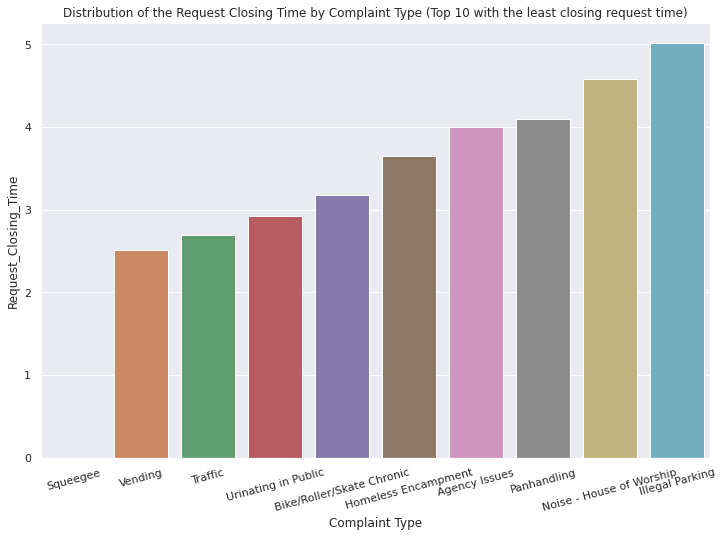

In [133]:
plt.figure(figsize=[12,8])
sns.barplot(x='Complaint Type',y= 'Request_Closing_Time', data=fastest_request_closing_time_by_complaint_type)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint Type (Top 10 with the least closing request time)');
plt.savefig('Fastest_Request_closing_time_by_complaint_type.jpeg',papertype='a3')

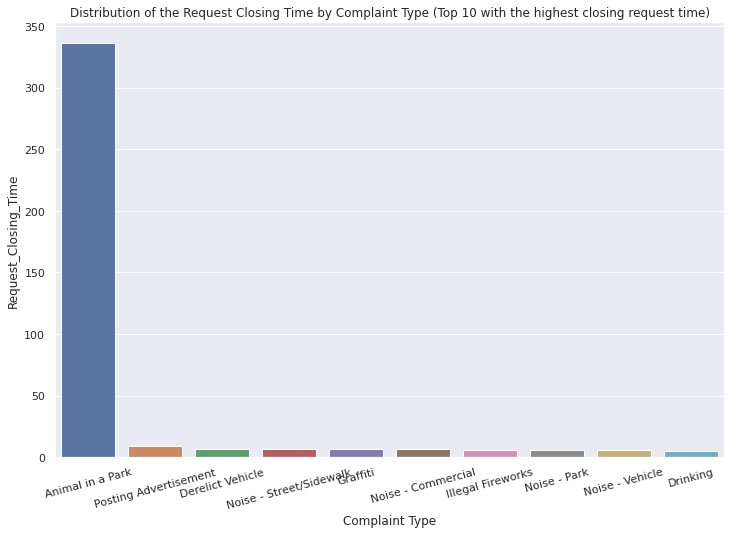

In [135]:
plt.figure(figsize=[12,8])
sns.barplot(x='Complaint Type',y= 'Request_Closing_Time', data=slowest_request_closing_time_by_complaint_type)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint Type (Top 10 with the highest closing request time)');
plt.savefig('Slowest_Request_closing_time_by_complaint_type.jpeg',papertype='a3')

### 2. Visualise data by Closing times by location and complaint type

In [188]:
#Mean Request closing Time by Complaint Type and Location
request_closing_time_by_complaint_location_type =\
df_thin.groupby(['Location Type','Complaint Type'])[['Request_Closing_Time']].mean().\
sort_values(by='Request_Closing_Time').reset_index()

In [189]:
request_closing_time_by_complaint_location_type

,Location Type,Complaint Type,Request_Closing_Time
0,Bridge,Homeless Encampment,0.000000
1,Street/Sidewalk,Squeegee,0.000000
2,Store/Commercial,Posting Advertisement,0.000000
3,Subway Station,Urinating in Public,0.000000
4,Park/Playground,Panhandling,0.000000
...,...,...,...
64,Street/Sidewalk,Posting Advertisement,9.806897
65,Store/Commercial,Illegal Fireworks,12.000000
66,Street/Sidewalk,Graffiti,15.360000
67,Roadway Tunnel,Derelict Vehicle,24.000000


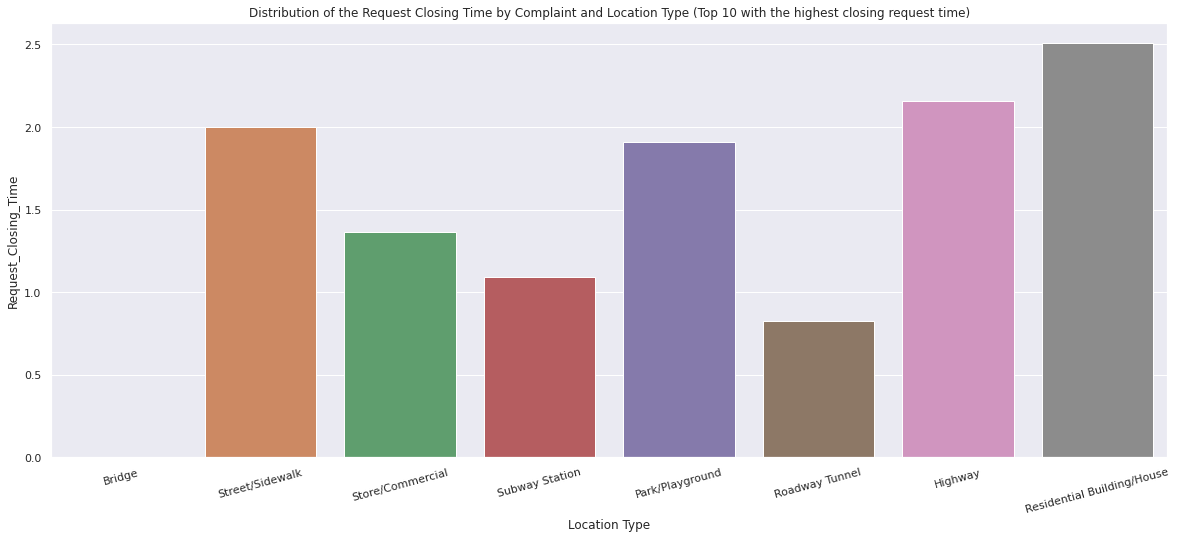

In [197]:
plt.figure(figsize=[20,8])
sns.barplot(x='Location Type',y= 'Request_Closing_Time', data=request_closing_time_by_complaint_location_type[:20],ci=False)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint and Location Type (Top 10 with the highest closing request time)');
plt.savefig('Fastest_Request_closing_time_by_complaint_location_type.jpeg',papertype='a3')

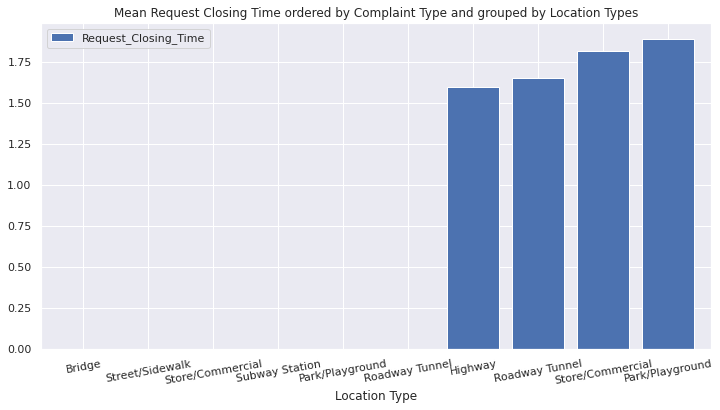

In [192]:
fig,ax= plt.subplots(figsize=[12,6])
request_closing_time_by_complaint_location_type[:10].plot.bar(x='Location Type',rot=10,ax=ax,width=0.80)
plt.title('Mean Request Closing Time ordered by Complaint Type and grouped by Location Types')
plt.savefig('top10_mean_request_closing_time_per_location_type.jpg');

In [252]:
location_complaint_group_times = df_thin.groupby(['Location Type','Complaint Type'])[['Request_Closing_Time']].mean().sort_values(by='Request_Closing_Time').reset_index()

In [253]:
location_complaint_group_times
#this proves that Location Bridge or Street/Sidewalk with Complaints Homeless or Squeegee are resolved fastest

,Location Type,Complaint Type,Request_Closing_Time
0,Bridge,Homeless Encampment,0.000000
1,Street/Sidewalk,Squeegee,0.000000
2,Store/Commercial,Posting Advertisement,0.000000
3,Subway Station,Urinating in Public,0.000000
4,Park/Playground,Panhandling,0.000000
...,...,...,...
64,Street/Sidewalk,Posting Advertisement,9.806897
65,Store/Commercial,Illegal Fireworks,12.000000
66,Street/Sidewalk,Graffiti,15.360000
67,Roadway Tunnel,Derelict Vehicle,24.000000


In [251]:
location_complaint_group_counts = df_thin.groupby(['Location Type','Complaint Type']).size().sort_values().reset_index()

In [259]:
location_complaint_group_counts['counts']= location_complaint_group_counts[0]
location_complaint_group_counts.drop([0],axis=1)
#count of complaints based location and complaint

,Location Type,Complaint Type,counts
0,Roadway Tunnel,Homeless Encampment,1
1,Park,Animal in a Park,1
2,Store/Commercial,Illegal Fireworks,2
3,Bridge,Homeless Encampment,2
4,Street/Sidewalk,Squeegee,4
...,...,...,...
64,Street/Sidewalk,Derelict Vehicle,17485
65,Store/Commercial,Noise - Commercial,18401
66,Street/Sidewalk,Noise - Street/Sidewalk,48067
67,Street/Sidewalk,Illegal Parking,74497


### 3.Now we can check the City Wise Complaints

In [266]:
complaints_by_city = df_thin.groupby(['City'])

In [276]:
complaints_by_city= complaints_by_city.count().sort_values(by='Complaint Type',ascending=False).reset_index()


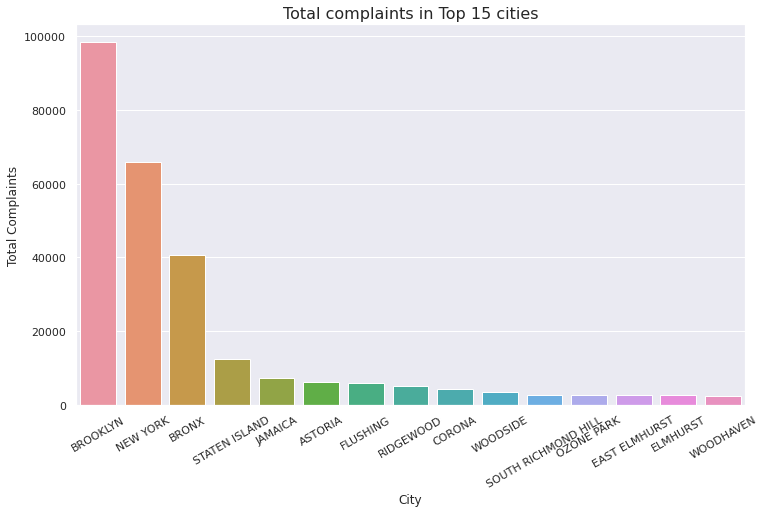

In [282]:
plt.figure(figsize=[12,7])
sns.barplot('City', 'Complaint Type', data=complaints_by_city[:15])
plt.xticks(rotation=30)
plt.title('Total complaints in Top 15 cities', fontsize=16)
plt.ylabel('Total Complaints');
plt.savefig('request_closing_request_time_by_city.jpeg',dpi=100)

Brooklyn, New York, Bronx are the major cities getting maximum complaints

### 4. Visualise the Complaint Types in percentage

In [317]:
complaint_types_per = df_thin['Complaint Type'].value_counts()

In [328]:
pie_values=df_thin['Complaint Type'].value_counts().sort_values(ascending=False)

In [333]:
pie_labels = pie_values.keys().tolist()

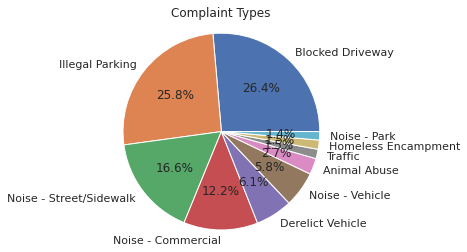

In [335]:
plt.pie(pie_values[:10],labels=pie_labels[0:10],autopct='%1.1f%%')
plt.title('Complaint Types')
plt.axis('equal')
plt.show()

### 5. Status of the complaints, and visualise time taken to resolve them 

In [340]:
status_matrix = df_thin['Status'].value_counts().to_frame()

In [342]:
status_matrix
#Most of the tickets are closed

,Status
Closed,298471
Open,1439
Assigned,786
Draft,2


In [370]:
df_thin['Resolution_in_Days']= df_thin['Request_Closing_Time']/24

In [371]:
df_thin['Resolution_in_Days']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
300693    NaN
300694    0.0
300695    0.0
300696    0.0
300697    0.0
Name: Resolution_in_Days, Length: 300698, dtype: float64

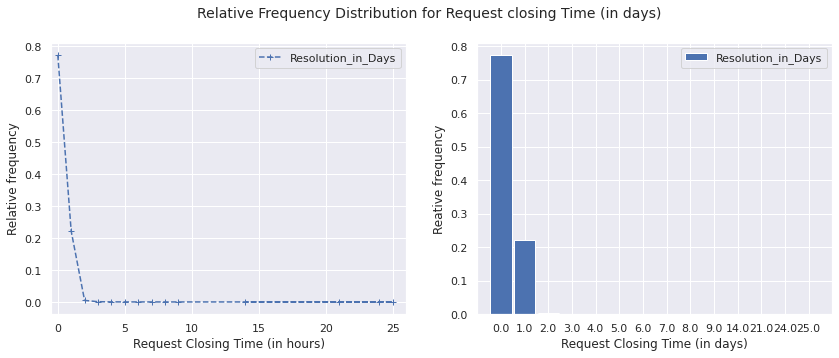

In [377]:
fig,ax= plt.subplots(1,2,figsize=[14,5])
df_thin['Resolution_in_Days'].value_counts().to_frame().transform(lambda x:x/x.sum()).plot(marker='+',ax=ax[0],linestyle='--')
ax[0].set(xlim=(-0.5,26),xlabel= 'Request Closing Time (in hours)',ylabel= 'Relative frequency')
df_thin['Resolution_in_Days'].value_counts().to_frame().sort_index().transform(lambda x:x/x.sum()).plot(kind='bar',ax=ax[1],rot=0,width=0.9)
ax[1].set(xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency',xlim=(-1,14))
fig.suptitle('Relative Frequency Distribution for Request closing Time (in days)',fontsize=14);